# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data display customization
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
# Load the data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Percentage of null values in each column
round(100*(df.isnull().sum()/len(df)),4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
How did you hear about X Education               23.8853
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

In [7]:
# Analyzing Duplicate rows
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


###### No duplicates in the data!

In [8]:
round(100*(df.isnull().sum()/len(df)),4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
How did you hear about X Education               23.8853
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

# Step 2: Data Cleaning

In [9]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)
df['City'] = df['City'].replace('Select', np.nan)

In [10]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

###### As seen from above, there are few columns with only 1 unique value. 

Get updates on DM Content

Update me on Supply Chain Content

I agree to pay the amount through cheque

Receive More Updates About Our Courses

Magazine

###### These columns have only one unique value with no null values so we can drop them as they wont contribute much to the model.

In [11]:
round(100*(df.isnull().sum()/len(df)),4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   36.5801
How did you hear about X Education               78.4632
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

In [12]:
# Removing all the columns that have 35% null values
df1 = df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


As seen from above, there are few columns with only 1 unique value.

Get updates on DM Content

Update me on Supply Chain Content

I agree to pay the amount through cheque

Receive More Updates About Our Courses

Magazine

These columns have only one unique value with no null values so we can drop them as they wont contribute much to the model.

In [13]:
df_lead = df1.drop(['Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Magazine', 'Prospect ID'],axis=1)
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [14]:
# There are a few features that are really close to the threshold figure of null values, so we should analyze them

df_lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

###### OBSERVATION:

This column is heavily skewed towards better career prospects.Hence we can drop this column since almost all candidates that take this course are looking to have a better career.

In [15]:
df_lead.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [16]:
df_lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
df_lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [18]:
df_lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [19]:
# Around 85% of the data is Unemployed so we can impute the 29% of missing values with 'Unemployed'
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Unemployed')
df_lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [20]:
df_lead.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Kuwait                  0.000590
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
South Africa            0.000590
Sweden                  0.000443
Netherlands             0.000295
Italy                   0.000295
Belgium                 0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Ghana                   0.000295
Uganda                  0.000295
China                   0.000295
Russia                  0.000148
Liberia                 0.000148
Indonesia 

In [21]:
# Around 96% of the data is India and 27% data is missing . Hence dropping this column wont impact the model
#drop country column
df_lead = df_lead.drop('Country', axis=1)

In [22]:
# check for percentage of null values in each column 
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [23]:
# Now drop the rest of the missing data present within the data
df_lead.dropna(inplace=True)

# 3. Univariate and Bivariate Analysis

## 3. 1. Univariate analysis

In [24]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

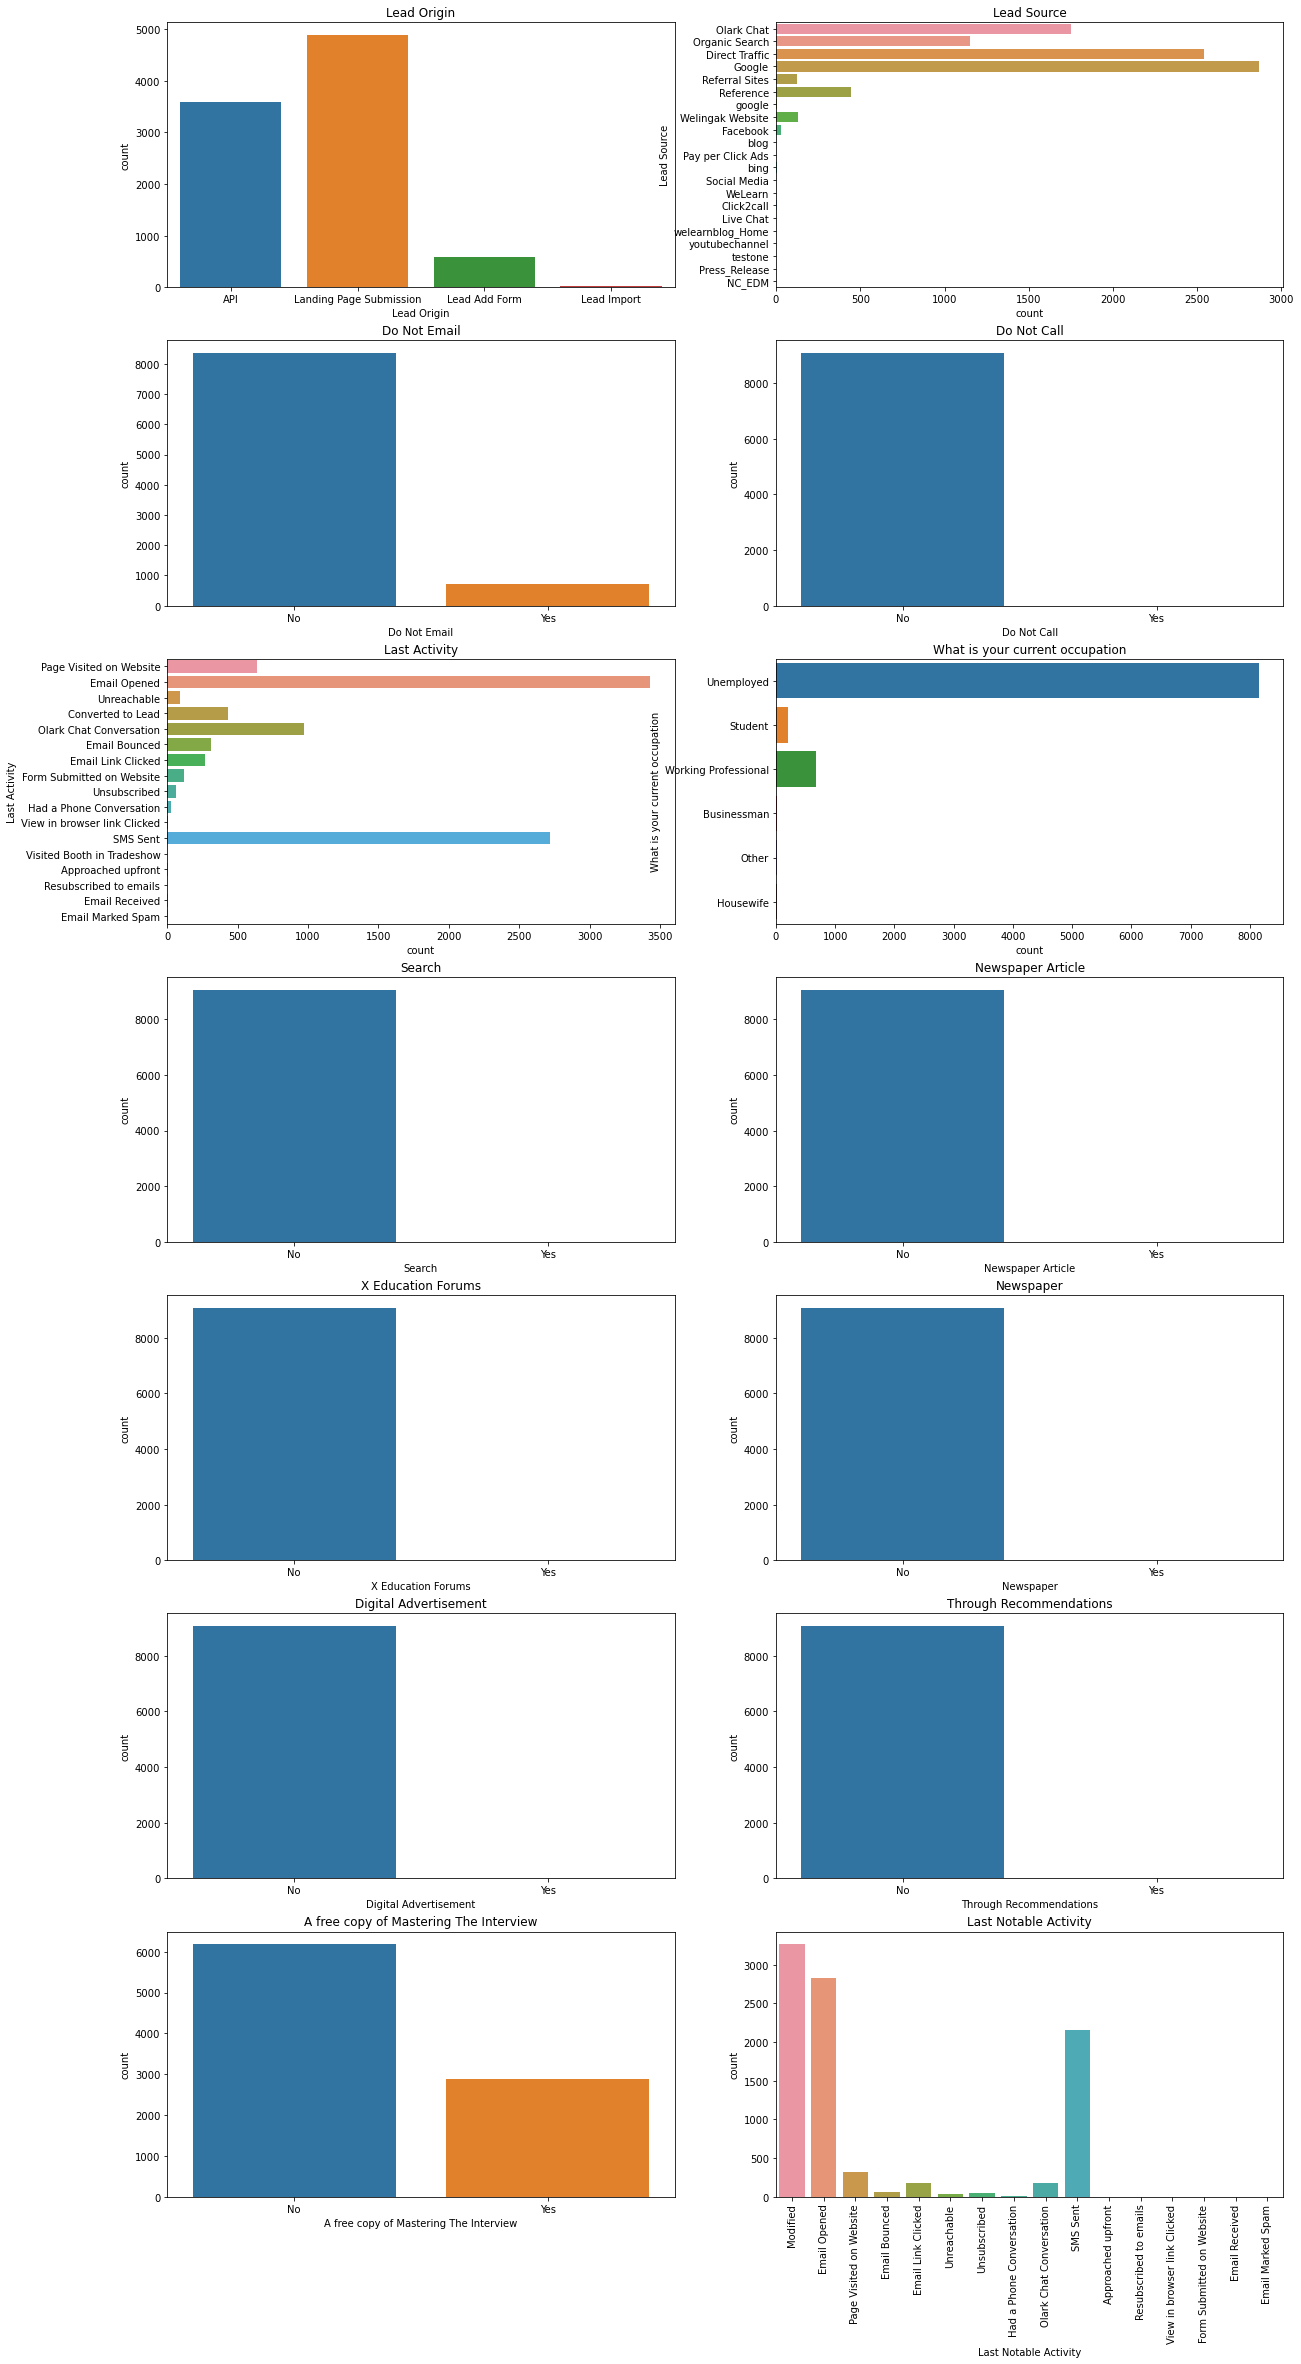

In [25]:
# Analyzing categorical columns

plt.figure(figsize = (20,40))

plt.subplot(7,2,1)
sns.countplot(df_lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,2,2)
sns.countplot(y=df_lead['Lead Source'])
plt.title('Lead Source')

plt.subplot(7,2,3)
sns.countplot(df_lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,2,4)
sns.countplot(df_lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,2,5)
sns.countplot(y=df_lead['Last Activity'])
plt.title('Last Activity')

plt.subplot(7,2,6)
sns.countplot(y=df_lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(7,2,7)
sns.countplot(df_lead['Search'])
plt.title('Search')

plt.subplot(7,2,8)
sns.countplot(df_lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(7,2,9)
sns.countplot(df_lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,2,10)
sns.countplot(df_lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(7,2,11)
sns.countplot(df_lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,2,12)
sns.countplot(df_lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(7,2,13)
sns.countplot(df_lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,2,14)
sns.countplot(df_lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

##### OBSERVATIONS:
    
1. Landing Page Submission is the reason for most of the customers being identified as lead.
2. Google is the source from where most of the leads have been identified.
3. Most of the customers do not want to be contacted through e-mails and calls about the course.
4. Most of the customers are unemployed.
5. Among all the customers around one-third of the customers want a a free copy of 'Mastering the Interview'

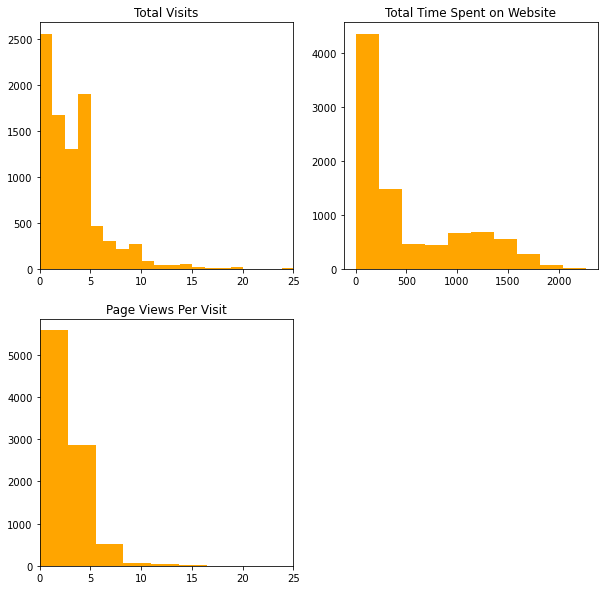

In [26]:
# Analyzing numerical columns

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(df_lead['TotalVisits'], bins = 200, color="orange")
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df_lead['Total Time Spent on Website'], bins = 10, color="orange")
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df_lead['Page Views Per Visit'], bins = 20, color="orange")
plt.title('Page Views Per Visit')
plt.xlim(0,25)
plt.show()

# 3.2. Bi-variate Analysis

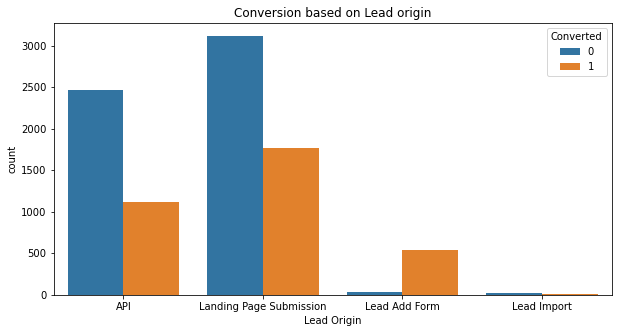

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
plt.title("Conversion based on Lead origin")
plt.show()

###### Observation

1. Lead Add Form has the highest conversion rate.
2. API and Landing Page Submission have similar conversion rates but they generate maximum leads counts.
3. Lead Import has the least amount of conversions and leads count.
4. To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission. Also,generate more leads from Lead Add form since they have a very good conversion rate.

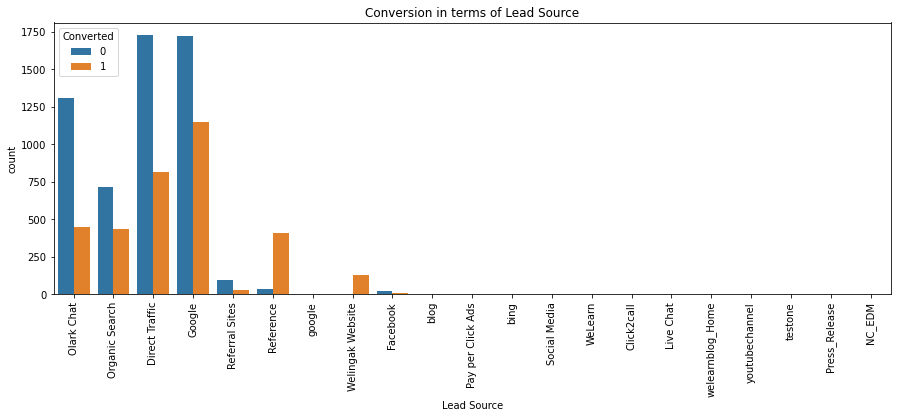

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

###### Observation
1. Few Lead sources have very low count.Hence we can merge them into common category 'Others'
2. Also , there are 2 categories with same name Google and google.Hence replace google with Google to have a single category

In [29]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

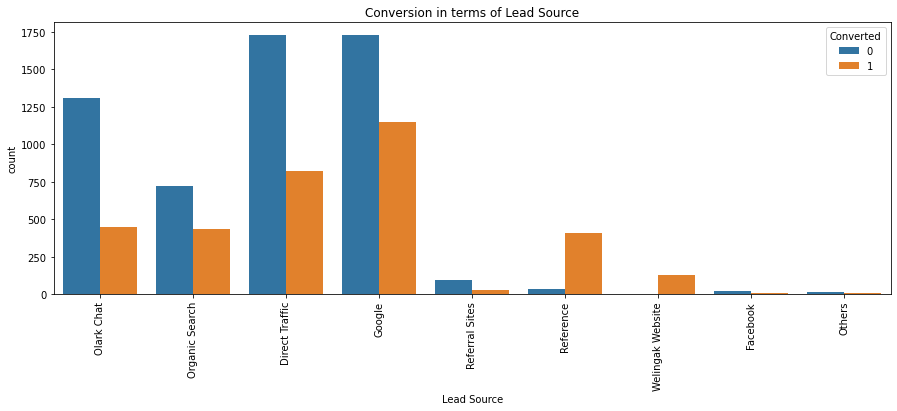

In [30]:
#generate the barplot again
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

###### Observations

1. Google and direct traffic generates maximum number of leads but do not have a high conversion rate.
2. Welingak website and References has highest conversion rates but generates less number of leads.
3. olark chat and organic search generates significant number of leads but their conversion rate is low.
4. Lead source in 'others' category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' generates very less leads.
5. To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source . Also, generate more leads from reference and welingak website since they have a very good conversion rate

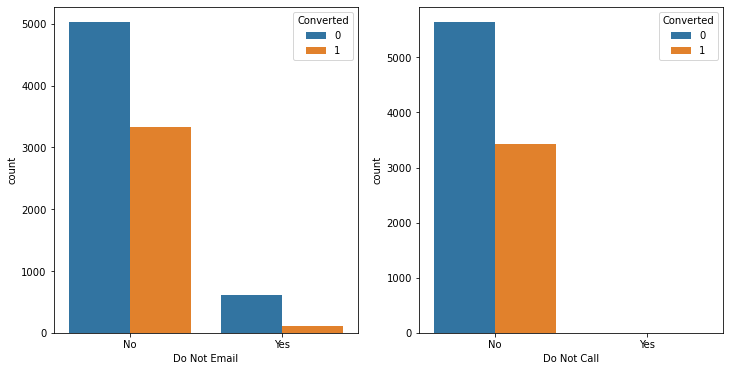

In [31]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_lead, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_lead, ax = axs[1])
plt.show()

###### Observations
Most of customers do not like to be called or receive emails about the course.

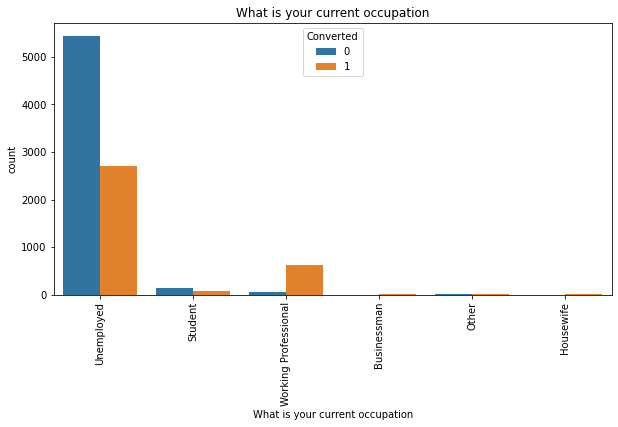

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

###### Observation

1. Working Professionals has the highest conversion rate followed by students.
2. Unemployeed leads have low conversion rates but they generate maximum leads counts.
3. To improve overall lead conversion rate, focus should be on improving lead conversion rate of unemployed. Also,generate more leads from Student and Working Professionals since they have a very good conversion rate.

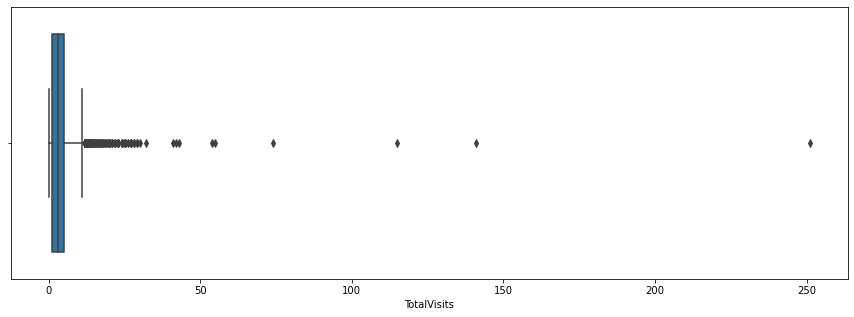

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(df_lead['TotalVisits'])
plt.show()

In [34]:
df_lead['TotalVisits'].describe([0.05,.25, .5, .75, .90, .95])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
max       251.000000
Name: TotalVisits, dtype: float64

###### OBSERVATIONS: 

From the boxplots, we can observe that for 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.

In [35]:
#Dealing with outliers in TotalVisits column

percentiles = df_lead['TotalVisits'].quantile([0.05,0.95]).values
df_lead['TotalVisits'][df_lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_lead['TotalVisits'][df_lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [36]:
var = ['Total Time Spent on Website', 'Page Views Per Visit']
df_lead[var].describe([0.05,.25, .5, .75, .90, .95])

,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000
mean,482.887481,2.370151
std,545.256560,2.160871
min,0.000000,0.000000
5%,0.000000,0.000000
25%,11.000000,1.000000
50%,246.000000,2.000000
75%,922.750000,3.200000
90%,1373.000000,5.000000
95%,1557.000000,6.000000


###### OBSERVATIONS:

1. There are no significant outliers in 'Total Time Spent on Website'.
2. For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [37]:
percentiles = df_lead['Page Views Per Visit'].quantile([0.05,0.95]).values
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

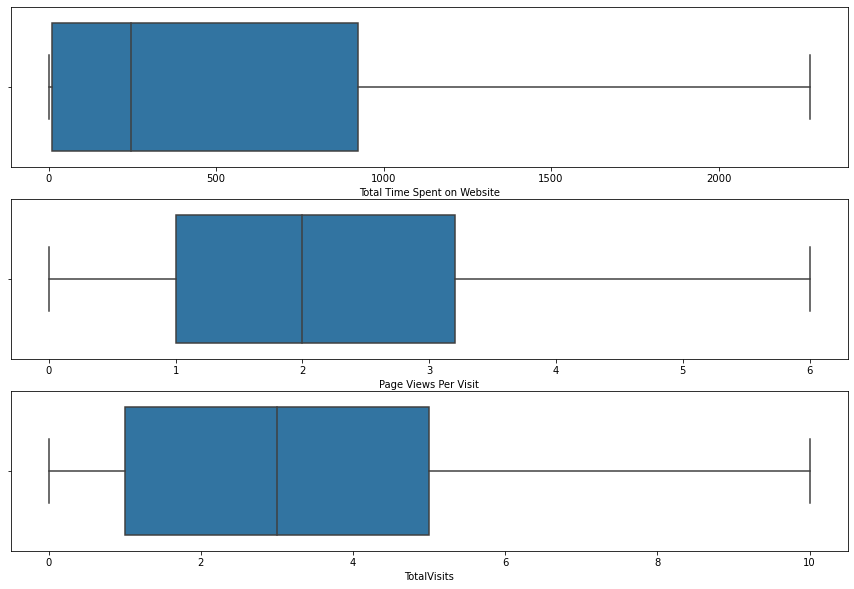

In [38]:
# Verify if the outliers are removed

var1 = ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in var1:
    plt.subplot(3,1,var1.index(var)+1)
    sns.boxplot(df_lead[var])
plt.show()

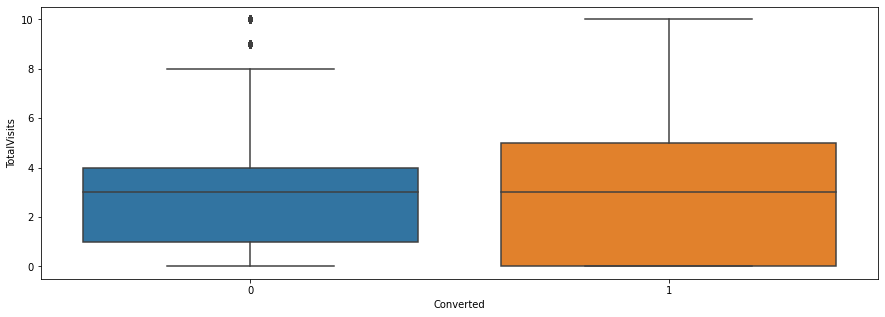

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_lead)
plt.show()

###### Observations:
1. Median for converted and non-converted leads are same.
2. People who visits the platform have equal chances(50-50) of applying and not applying for the course.

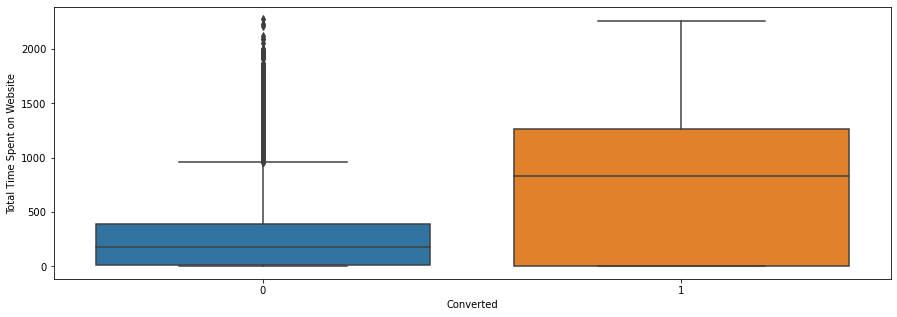

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_lead)
plt.show()

###### Observations:

1. People spending more time on website have more chances of opting for a course

2. People who spend less time on the website didn't opt for any courses.

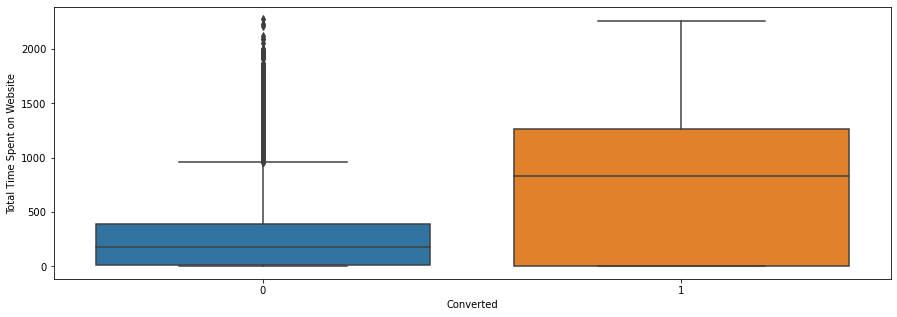

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_lead)
plt.show()

###### Observations:
    
1. People spending more time on website have more chances of opting for a course.
2. People who spend less time on the website didn't opt for any courses which is usually the case.

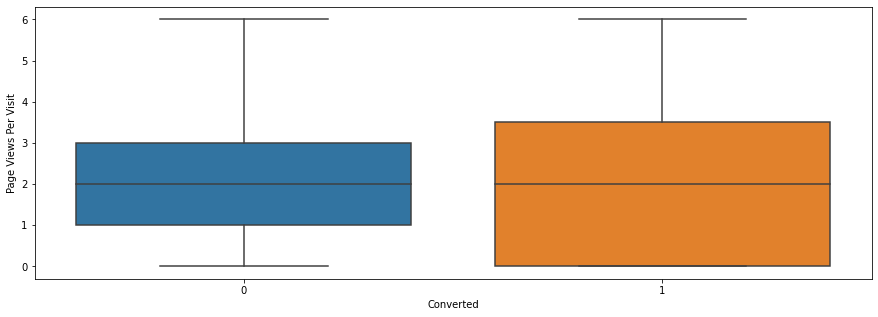

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_lead)
plt.show()

###### OBSERVATIONS: 
    
1. Median for converted and non-converted leads are same.
2. People who visits 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course.

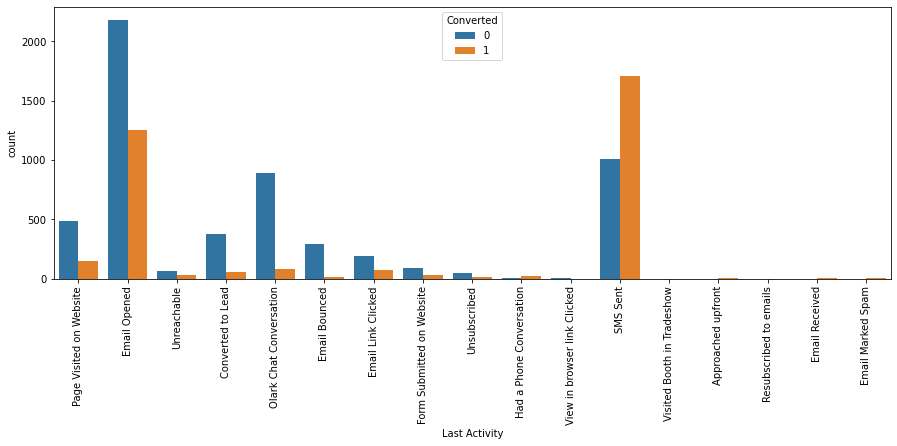

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

###### Observation:

1. Maximum leads are generated from people with last activity - Email opened and SMS sent.
2. Conversion rate is highest for SMS Sent.
3. olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is around is low.
4. To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation, Email Opened and Page Visited on Website .

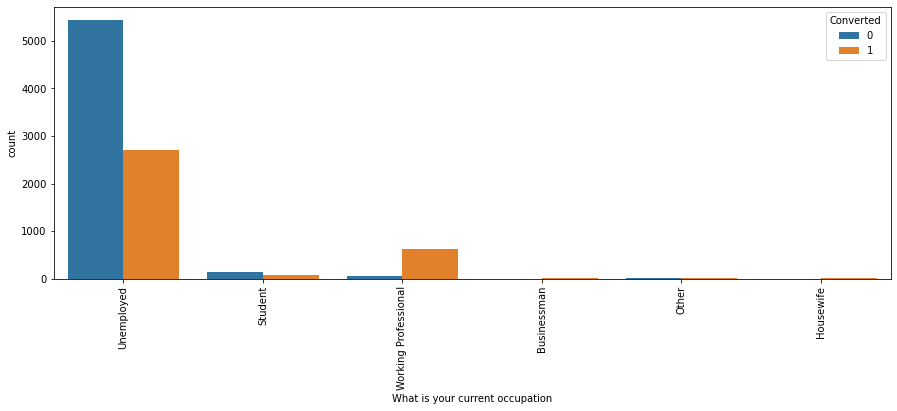

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

###### Observations:
1. Working Professionals, Student and Unemployed people generates maximum leads .
2. Conversion rate for Working Professionals is high followed by Unemployed people.
3. To improve overall lead conversion rate, focus should be on improving lead conversion of unemployed. Also, generate more leads from Working Professionals.

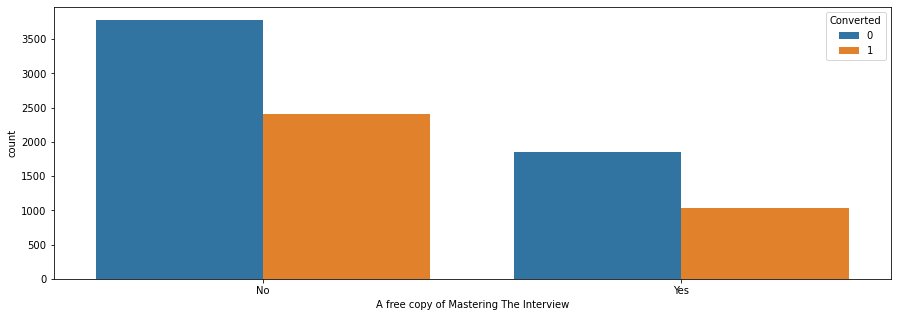

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)

plt.show()

##### Observation:
1. Most of the customers didnt want the free copy of Mastering The Interview.
2. Customers who opted for free copy have conversion rate almost the same as who didnt opt had conversion rate.

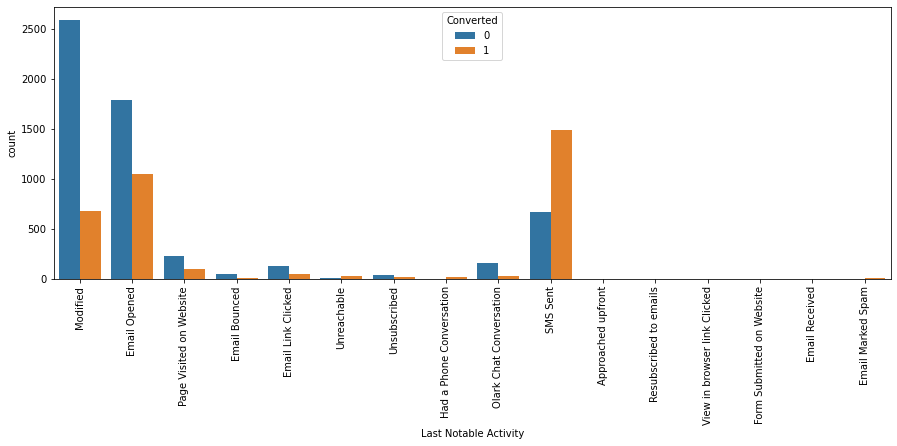

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

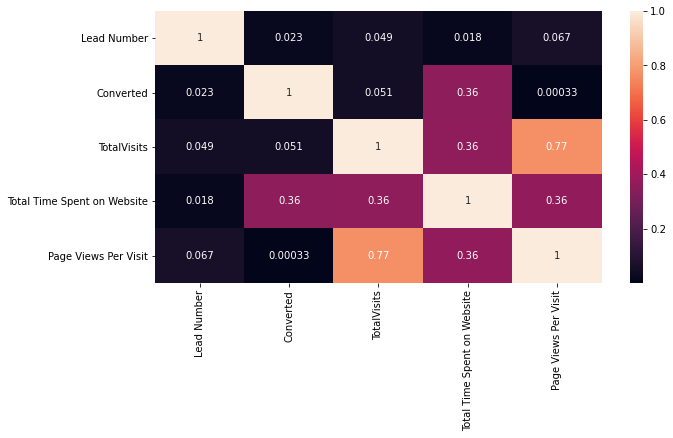

In [47]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_lead.corr(), annot = True)
plt.show()

##### Observations:
1. Total visits and Page views per visit column are correlated.
2. Hence we should have either of this column in our model to avoid multi-collinearity

In [48]:
# Based on our data analysis, we conclude that many variables are not significant to the model.

df_lead = df_lead.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [49]:
df_lead.shape

(9074, 12)

# Step 4: Data Preparation - Creating Dummies

In [50]:
df_lead.nunique()

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Last Activity                               17
What is your current occupation              6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

###### 'A free copy of Mastering The Interview','Do Not Email','Do Not Call' are the variables apart from the target variable that have binary data.

In [51]:
# Converting 'Yes' and 'No' values into 1 and 0 respectively.
list1 = ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']
def map_binary(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
df_lead[list1] = df_lead[list1].apply(map_binary)

In [52]:
# Create a dummy variable for the categorical variables

dummy_var = ['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']
dummy_data = pd.get_dummies(df_lead[dummy_var],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Combining dummy data with the original dataset

df_lead = pd.concat([df_lead, dummy_data], axis=1)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversat

In [55]:
# Drop the original columns 
cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity','Lead Source_Others']
df_lead = df_lead.drop(cols, axis=1)
df_lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
df_lead.shape

(9074, 53)

# Step 5: Train-Test Split

In [57]:
# Putting feature variable to X
X = df_lead.drop(['Converted'], axis=1)

# Putting response variable to y
y = df_lead['Converted']

In [58]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=180)

# Step 6: Feature Scaling using StandardScaler

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 6849 to 8076
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   Do Not Call                                           6351 non-null   int64  
 2   TotalVisits                                           6351 non-null   float64
 3   Total Time Spent on Website                           6351 non-null   int64  
 4   Page Views Per Visit                                  6351 non-null   float64
 5   A free copy of Mastering The Interview                6351 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 8   Lead Origin_Lead Import                               6

In [60]:
#create object of StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6849,0,0,-1.154642,-0.892457,-1.273821,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6799,0,0,0.979564,1.814852,2.069890,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2774,0,0,-0.087539,-0.381056,0.398035,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4277,1,0,-0.798941,-0.333399,-0.716536,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4061,0,0,-1.154642,-0.892457,-1.273821,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Step 7: Feature Selection Using RFE

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

# running RFE with 18 variables as output
rfe = RFE(logreg, 18) 
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Marked Spam', False, 20),
 ('Last Activity_Email Opened', False, 25),
 ('Last Activity_Email Received', False, 30),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone

In [63]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

# Step 8: Model Building

In [64]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.5
Date:                Sat, 15 Oct 2022   Deviance:                       5302.9
Time:                        21:50:22   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6802      0.571      2.945      0.003       0.562       2.799
Do Not Email                                            -1.3191      0.193     -6.820      0.000      -1.698      -0.940
Total Time Spent on Website                              1.0948      0.040     27.568      0.000       1.017       1.173
Lead Origin_Lead Add Form                                1.0916      1.067      1.023      0.306      -0.999       3.182
Lead Source_Olark Chat                                   1.2172      0.102     11.990      0.000       1.018       1.416
Lead Source_Reference                                    2.8837      1.093      2.639      0.008       0.742       5.026
Lead Source_Welingak Website                             4.6465      1.290      3.603      0.000       2.119       7.174
Last Activity_Converted to Lead                         -1.1273      0.213     -5.290      0.000      -1.545      -0.710
Last Activity_Email Bounced                             -1.3313      0.378     -3.524      0.000      -2.072      -0.591
Last Activity_Olark Chat Conversation                   -1.5179      0.191     -7.952      0.000      -1.892      -1.144
Last Activity_Page Visited on Website                   -1.2561      0.148     -8.466      0.000      -1.547      -0.965
What is your current occupation_Housewife               21.5532   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_Student                 -1.2077      0.606     -1.993      0.046      -2.395      -0.020
What is your current occupation_Unemployed              -1.5564      0.566     -2.752      0.006      -2.665      -0.448
What is your current occupation_Working Professional     1.3442      0.596      2.256      0.024       0.176       2.512
Last Notable Activity_Email Link Clicked                -1.8208      0.253     -7.207      0.000      -2.316      -1.326
Last Notable Activity_Email Opened                      -1.3930      0.087    -15.999      0.000      -1.564      -1.222
Last Notable Activity_Modified                          -1.4715      0.097    -15.107      0.000      -1.662      -1.281
Last Notable Activity_Olark Chat Conversation           -1.6606      0.381     -4.363      0.000      -2.407      -0.915
========================================================================================================================
"""

In [65]:
# The p value for column 'Lead Origin_Lead Add Form' is high and above the threshold of 0.05. Hence we will drop this column from our model.
col1 = col.drop('Lead Origin_Lead Add Form',1)
col1

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [66]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.0
Date:                Sat, 15 Oct 2022   Deviance:                       5303.9
Time:                        21:50:22   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6799      0.570      2.945      0.003       0.562       2.798
Do Not Email                                            -1.3209      0.193     -6.830      0.000      -1.700      -0.942
Total Time Spent on Website                              1.0941      0.040     27.557      0.000       1.016       1.172
Lead Source_Olark Chat                                   1.2172      0.102     11.990      0.000       1.018       1.416
Lead Source_Reference                                    3.9739      0.246     16.158      0.000       3.492       4.456
Lead Source_Welingak Website                             5.7367      0.727      7.886      0.000       4.311       7.163
Last Activity_Converted to Lead                         -1.1275      0.213     -5.292      0.000      -1.545      -0.710
Last Activity_Email Bounced                             -1.3303      0.378     -3.522      0.000      -2.071      -0.590
Last Activity_Olark Chat Conversation                   -1.5187      0.191     -7.957      0.000      -1.893      -1.145
Last Activity_Page Visited on Website                   -1.2519      0.148     -8.449      0.000      -1.542      -0.961
What is your current occupation_Housewife               21.5542   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_Student                 -1.2070      0.606     -1.993      0.046      -2.394      -0.020
What is your current occupation_Unemployed              -1.5545      0.565     -2.749      0.006      -2.663      -0.446
What is your current occupation_Working Professional     1.3449      0.596      2.258      0.024       0.177       2.512
Last Notable Activity_Email Link Clicked                -1.8224      0.253     -7.214      0.000      -2.318      -1.327
Last Notable Activity_Email Opened                      -1.3936      0.087    -16.007      0.000      -1.564      -1.223
Last Notable Activity_Modified                          -1.4724      0.097    -15.117      0.000      -1.663      -1.282
Last Notable Activity_Olark Chat Conversation           -1.6609      0.381     -4.365      0.000      -2.407      -0.915
========================================================================================================================
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.32
15,Last Notable Activity_Modified,3.01
14,Last Notable Activity_Email Opened,2.24
7,Last Activity_Olark Chat Conversation,2.06
0,Do Not Email,1.86
2,Lead Source_Olark Chat,1.81
6,Last Activity_Email Bounced,1.78
16,Last Notable Activity_Olark Chat Conversation,1.40
1,Total Time Spent on Website,1.30
5,Last Activity_Converted to Lead,1.29


In [68]:
# The p value for column 'What is your current occupation_Working Professional' is high and above the threshold of 0.05. Hence we will drop this column from our model.
col2 = col1.drop('What is your current occupation_Working Professional',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [69]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.4
Date:                Sat, 15 Oct 2022   Deviance:                       5308.7
Time:                        21:50:22   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.9095      0.190     15.297      0.000       2.537       3.282
Do Not Email                                     -1.3283      0.194     -6.856      0.000      -1.708      -0.949
Total Time Spent on Website                       1.0935      0.040     27.544      0.000       1.016       1.171
Lead Source_Olark Chat                            1.2154      0.101     11.975      0.000       1.017       1.414
Lead Source_Reference                             3.9770      0.246     16.177      0.000       3.495       4.459
Lead Source_Welingak Website                      5.7352      0.727      7.884      0.000       4.309       7.161
Last Activity_Converted to Lead                  -1.1141      0.212     -5.255      0.000      -1.530      -0.699
Last Activity_Email Bounced                      -1.3144      0.376     -3.492      0.000      -2.052      -0.577
Last Activity_Olark Chat Conversation            -1.5194      0.191     -7.964      0.000      -1.893      -1.145
Last Activity_Page Visited on Website            -1.2742      0.148     -8.594      0.000      -1.565      -0.984
What is your current occupation_Housewife        20.3290   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_Student          -2.4309      0.284     -8.562      0.000      -2.987      -1.874
What is your current occupation_Unemployed       -2.7789      0.182    -15.230      0.000      -3.137      -2.421
Last Notable Activity_Email Link Clicked         -1.8245      0.252     -7.232      0.000      -2.319      -1.330
Last Notable Activity_Email Opened               -1.3997      0.087    -16.092      0.000      -1.570      -1.229
Last Notable Activity_Modified                   -1.4775      0.097    -15.175      0.000      -1.668      -1.287
Last Notable Activity_Olark Chat Conversation    -1.6588      0.380     -4.369      0.000      -2.403      -0.915
=================================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.83
14,Last Notable Activity_Modified,2.85
7,Last Activity_Olark Chat Conversation,2.06
13,Last Notable Activity_Email Opened,2.04
0,Do Not Email,1.85
6,Last Activity_Email Bounced,1.78
2,Lead Source_Olark Chat,1.77
15,Last Notable Activity_Olark Chat Conversation,1.39
5,Last Activity_Converted to Lead,1.29
1,Total Time Spent on Website,1.23


###### Observations:
1. The VIF values of all the variables are under threshold value of 5.
2. The p value of all variables are under threshold value 0.05.
3. Hence we will consider Model 3 as our model.

In [71]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6849    0.056889
6799    0.671622
2774    0.045747
4277    0.012690
4061    0.958183
2317    0.420082
9022    0.904624
9032    0.592690
7524    0.116144
3587    0.104260
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05688879, 0.67162175, 0.04574714, 0.01269043, 0.95818265,
       0.42008249, 0.90462391, 0.59268987, 0.11614394, 0.10425998])

# Creating a dataframe with the actual converted flag and the predicted probabilities

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,ID
0,0,0.056889,6849
1,1,0.671622,6799
2,0,0.045747,2774
3,0,0.012690,4277
4,1,0.958183,4061


In [74]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted
0,0,0.056889,6849,0
1,1,0.671622,6799,1
2,0,0.045747,2774,0
3,0,0.012690,4277,0
4,1,0.958183,4061,1


# Step 9: Model Evaluation

In [75]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3517  437]
 [ 744 1653]]


In [76]:
# Overall Accuracy.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8140450322783813


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity: ", round((TP / float(TP+FN)),2))
print("Specificity:", round((TN / float(TN+FP)),2))
print("False positive Rate: ", round(FP/ float(TN+FP),2))
print("positive predictive value: ", round(TP / float(TP+FP),2))
print ("Negative predictive value: ", round(TN / float(TN+ FN),2))

Sensitivity:  0.69
Specificity: 0.89
False positive Rate:  0.11
positive predictive value:  0.79
Negative predictive value:  0.83


# Step 10: Plotting the ROC Curve

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

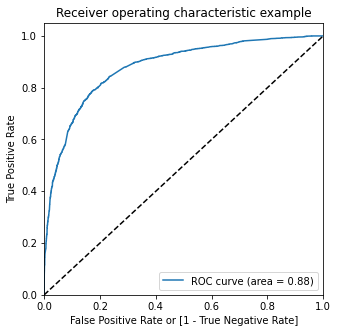

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###### The ROC Curve should be a value close to 1. We are getting a value of 0.81 indicating a good predictive model.

# Step 11: Finding Optimal Cutoff Point

In [81]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056889,6849,0,1,0,0,0,0,0,0,0,0,0
1,1,0.671622,6799,1,1,1,1,1,1,1,1,0,0,0
2,0,0.045747,2774,0,1,0,0,0,0,0,0,0,0,0
3,0,0.012690,4277,0,1,0,0,0,0,0,0,0,0,0
4,1,0.958183,4061,1,1,1,1,1,1,1,1,1,1,1


In [82]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.377421     1.000000    0.000000
0.1          0.1  0.577704     0.967042    0.341679
0.2          0.2  0.745709     0.906133    0.648457
0.3          0.3  0.796253     0.828953    0.776429
0.4          0.4  0.814045     0.766792    0.842691
0.5          0.5  0.814045     0.689612    0.889479
0.6          0.6  0.794678     0.575302    0.927668
0.7          0.7  0.782554     0.501043    0.953212
0.8          0.8  0.761140     0.410930    0.973445
0.9          0.9  0.711384     0.251982    0.989884


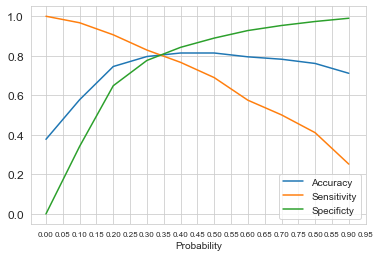

In [83]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

##### Observation:
From the above curve we can see that the optimal cutoff is at 0.36. This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced.

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.056889,6849,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.671622,6799,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.045747,2774,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.012690,4277,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.958183,4061,1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085340891198236

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3235,  719],
       [ 497, 1900]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's check the sensitivity 
print("Sensitivity: ", round(TP / float(TP+FN),3))

# Let us calculate specificity
print("Specificity: ", round(TN / float(TN+FP),3))

# Calculate false postive rate 
print("False positive Rate: ", round(FP/ float(TN+FP),3))

# positive predictive value 
print ("Positive Predictive Value: ", round(TP / float(TP+FP),3))

# Negative predictive value
print("Negative Predictive Value: ", round(TN / float(TN+ FN),3))

Sensitivity:  0.793
Specificity:  0.818
False positive Rate:  0.182
Positive Predictive Value:  0.725
Negative Predictive Value:  0.867


##### Observation
when we are selecting the optimal cutoff = 0.36, the various performance parameters Accuracy, Sensitivity & Specificity are all above 79%.

# Step 12: Metrics - Precision and Recall

In [88]:
print("Precision: ", round(TP/float(TP+FP),3))
print("Recall: ", round(TP/float(TP+FN),3))

Precision:  0.725
Recall:  0.793


In [89]:
#Calculating precision using precision_score function from sklearn
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7254677357770142

In [90]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926574885273259

###### Observations:
As per our business objective, the recall percentage is more significant since we don't want to left out any hot leads which are willing to get converted and a Recall value of 79% suggest a good model.

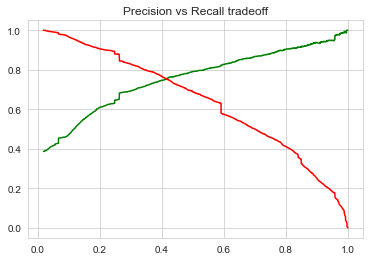

In [91]:
from sklearn.metrics import precision_recall_curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Conversion_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

###### OBSERVATIONS: 
As seen from above, there is tradeoff between Precision and Recall. Precision and Recall are inversely related means if one increases other will genuinely decrease.

# Step 13: Making predictions on the test set

In [92]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [93]:
X_test = X_test[col2]

X_test.shape

(2723, 16)

In [94]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2636,0,-0.892457,1,0,0,0,0,0,0,0,0,1,0,0,1,0
5338,1,-0.465373,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7616,0,-0.892457,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2561,0,-0.379223,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9128,0,-0.782478,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
X_test_sm = sm.add_constant(X_test)

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

2636    0.248357
5338    0.039769
7616    0.263174
2561    0.146591
9128    0.326284
7311    0.198275
7430    0.029442
4043    0.009820
581     0.068680
7314    0.394990
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2636,0.248357
5338,0.039769
7616,0.263174
2561,0.146591
9128,0.326284


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [100]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [101]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [103]:
y_pred_final

,Converted,Prospect ID,0
0,0,2636,0.248357
1,0,5338,0.039769
2,0,7616,0.263174
3,0,2561,0.146591
4,0,9128,0.326284
...,...,...,...
2718,1,2932,0.849676
2719,0,4897,0.441359
2720,0,3345,0.263174
2721,0,4115,0.067435


In [104]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [105]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [106]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob
0,2636,0,0.248357
1,5338,0,0.039769
2,7616,0,0.263174
3,2561,0,0.146591
4,9128,0,0.326284


In [107]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [108]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,final_Predicted
0,2636,0,0.248357,0
1,5338,0,0.039769,0
2,7616,0,0.263174,0
3,2561,0,0.146591,0
4,9128,0,0.326284,0


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8116048475945649

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1377,  308],
       [ 205,  833]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ", round(TP / float(TP+FN),3))

# Let us calculate specificity
print("Specificity: ", round(TN / float(TN+FP),3))

Sensitivity:  0.803
Specificity:  0.817


In [112]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7300613496932515

In [113]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.802504816955684

###### Observation
1. We got around 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.

2. High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

In [114]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

###### Recommendations -
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. When the lead source was:
a. Olark Chat
b. Reference
c. Welingak website
3. When the last activity was:
a. Page Visited on Website
b. Olark chat conversation
c. Converted to Lead
d. Email Bounced
4. When their current occupation is a Housewife, Student and Unemployed.
5. When the last notable activity is email opened, activity modified and Olark Chat Conversation.

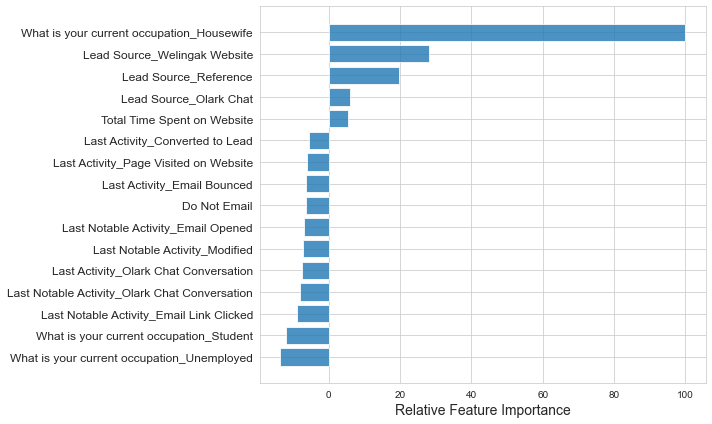

In [121]:
##Sorting the feature variables based on their relative coefficient values
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col2].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()